# Dataset

In [59]:
test = []
for i in range(1, 101):
  # filename = "/content/drive/MyDrive/BTP_TestSet_Mails/test" + str(i) + ".txt"
  filename = "./Goldset/test" + str(i) + ".txt"
  with open(filename, "r") as f:
    text = f.read().strip().lower().replace('\n', '')
    test.append(text)

In [60]:
import pandas as pd

# test_data_path = "/content/drive/MyDrive/BTP_Aishu/GoldSet_BTP - Sheet1.csv"
test_data_path = "./GoldsetTag.csv"
data = pd.read_csv(test_data_path)
data['Tags'] = data['Tags'].str.replace(" ", "")

In [61]:
# import urllib.request
# urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

In [62]:
!unzip "./glove.6B.zip" -d "/content/"

unzip:  cannot find or open ./glove.6B.zip, ./glove.6B.zip.zip or ./glove.6B.zip.ZIP.


In [63]:
# pip install torch

In [64]:
# pip install torchtext

In [65]:
import numpy as np
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from numpy.linalg import norm
import tensorflow as tf
import torch
import torchtext

In [66]:
glove_model = torchtext.vocab.GloVe(name="6B", dim=200)

###Preprocess

In [67]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('omw-1.4')

In [68]:
from nltk.corpus import stopwords
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'which', 'another', 'he', 'somehow', 'eight', 'the', '’m', 'does', "n't", 'every', '’re', 'those', 'seem', 'whose', 'and', 'but', 'nobody', 'throughout', '’s', 'once', 'at', 'because', 'not', 'across', 'around', 'our', 'keep', "'ve", 'are', 'although', 'whereafter', 'i', 'wherever', 'whether', 'five', 'is', 'whereby', 'cannot', 'were', 'make', 'most', 'nine', 'thru', 'twelve', 'out', 'unless', 'before', 'along', 'beforehand', 'might', 'himself', 'three', 'various', 'whatever', 'being', 'used', 'whole', 'thereupon', 'some', 'amongst', 'first', 'even', '‘s', 'together', 'within', 'noone', 'something', 'never', 'hereafter', 'indeed', 'among', 'alone', 'much', 'your', 'rather', 'whither', 'few', 'anyway', 'its', 'only', 'toward', 'both', 'herself', 'still', 'while', 'neither', 'ten', 'to', 'am', 'sometimes', 'down', 'call', 'by', 'below', 'beside', 'off', 'other', 'nor', 'where', 'side', 'been', 'anything', 'always', 'due', 'with', 'hereby', 'own', 'see', 'would', 'each', 'they', 'could',

In [69]:
def preprocess(email):
  tokens = nltk.word_tokenize(email)
  l_nouns = [lemmatizer.lemmatize(word) for word in tokens]
  non_stop = []
  for entry in l_nouns:
    if((entry not in stopwords.words('english')) and (entry not in sw_spacy) and (entry.isalnum()) and len(entry)>2):
      non_stop.append(entry)
  l_nouns = [word.lower() for word in non_stop]
  nouns = ' '.join(l_nouns)
  doc = nlp(nouns)
  nouns = [doc[i] for i in range(len(doc)) if doc[i].tag_ == 'NN' or doc[i].tag_ == 'NNS']
  nouns = [str(noun) for noun in nouns]
  return nouns

In [70]:
#@title LDA WordCloud
d = {0: {'group': 0.062,
  'peer': 0.016,
  'computer': 0.016,
  'information': 0.0155,
  'service': 0.015,
  'visit': 0.015,
  'inconvenience': 0.013,
  'application': 0.011000000000000001,
  'movie': 0.011,
  'discussion': 0.009333333333333334,
  'view': 0.009333333333333334,
  'nptel': 0.009,
  'connectivity': 0.009,
  'letter': 0.008,
  'connection': 0.008,
  'duty': 0.008,
  'join': 0.0075,
  'message': 0.007,
  'profile': 0.007,
  'internet': 0.007,
  'auction': 0.007,
  'deadline': 0.006666666666666667,
  'contact': 0.0065,
  'test': 0.006,
  'trip': 0.006,
  'water': 0.006,
  'list': 0.005666666666666667,
  'lab': 0.005333333333333333,
  'parent': 0.005,
  'income': 0.005,
  'scholarship': 0.005,
  'scheme': 0.005,
  'verb': 0.005,
  'repeat': 0.005,
  'arm': 0.005,
  'process': 0.0045,
  'campus': 0.0045,
  'thanks': 0.004333333333333333,
  'circuit': 0.004,
  'interview': 0.004,
  'seat': 0.004,
  'document': 0.004,
  'failure': 0.004,
  'issue': 0.003,
  'use': 0.0026,
  'internship': 0.002,
  'coordinator': 0.002,
  'form': 0.00175,
  'series': 0.0016666666666666668,
  'today': 0.0015},
 1: {'team': 0.021,
  'post': 0.019,
  'form': 0.015,
  'club': 0.015,
  'competition': 0.0145,
  'event': 0.0145,
  'assignment': 0.012,
  'google': 0.01,
  'candidate': 0.01,
  'selection': 0.01,
  'game': 0.009,
  'sport': 0.009,
  'fill': 0.0085,
  'submission': 0.0075,
  'member': 0.007,
  'batch': 0.007,
  'player': 0.007,
  'election': 0.007,
  'response': 0.006,
  'secretary': 0.006,
  'status': 0.006,
  'winner': 0.006,
  'student': 0.005,
  'contact': 0.005,
  'activity': 0.005,
  'affair': 0.005,
  'position': 0.005,
  'feel': 0.005,
  'participant': 0.005,
  'nomination': 0.005,
  'vote': 0.005,
  'people': 0.0045,
  'participation': 0.0045,
  'tomorrow': 0.004,
  'query': 0.004,
  'deadline': 0.0036666666666666666,
  'section': 0.0035,
  'entry': 0.0035,
  'mail': 0.003,
  'point': 0.0026666666666666666,
  'date': 0.0025,
  'note': 0.0023333333333333335,
  'thanks': 0.0023333333333333335,
  'time': 0.00225,
  'year': 0.00225,
  'detail': 0.0021999999999999997,
  'case': 0.002,
  'number': 0.0013333333333333333,
  'help': 0.0012000000000000001,
  'request': 0.0012000000000000001},
 2: {'session': 0.068,
  'student': 0.0178,
  'inform': 0.016,
  'information': 0.0135,
  'event': 0.0115,
  'workshop': 0.011,
  'college': 0.009,
  'kind': 0.0085,
  'message': 0.008,
  'opportunity': 0.008,
  'behalf': 0.008,
  'program': 0.0075,
  'join': 0.007,
  'registration': 0.006,
  'poster': 0.006,
  'link': 0.00575,
  'edition': 0.005,
  'register': 0.0045,
  'institution': 0.004,
  'contest': 0.004,
  'conduct': 0.004,
  'chance': 0.004,
  'university': 0.004,
  'hour': 0.004,
  'year': 0.0035,
  'participation': 0.0035,
  'competition': 0.003,
  'talk': 0.003,
  'detail': 0.0028,
  'share': 0.0025,
  'application': 0.0023333333333333335,
  'series': 0.002,
  'platform': 0.002,
  'industry': 0.002,
  'regard': 0.002,
  'speaker': 0.002,
  'research': 0.0016666666666666668,
  'day': 0.0016666666666666668,
  'institute': 0.0016666666666666668,
  'mail': 0.0016,
  'date': 0.0015,
  'request': 0.0014,
  'meeting': 0.0013333333333333333,
  'discussion': 0.0013333333333333333,
  'contact': 0.00125,
  'faculty': 0.00125,
  'case': 0.00125,
  'help': 0.0012000000000000001,
  'email': 0.001,
  'time': 0.0005},
 3: {'project': 0.024,
  'innovation': 0.018,
  'technology': 0.018,
  'team': 0.013,
  'min': 0.01,
  'idea': 0.009,
  'data': 0.009,
  'product': 0.009,
  'support': 0.009,
  'network': 0.008,
  'business': 0.008,
  'solution': 0.007,
  'problem': 0.006333333333333333,
  'communication': 0.006,
  'area': 0.006,
  'machine': 0.006,
  'challenge': 0.005,
  'science': 0.005,
  'skill': 0.005,
  'role': 0.005,
  'interest': 0.005,
  'leader': 0.005,
  'statement': 0.005,
  'career': 0.005,
  'job': 0.005,
  'opportunity': 0.0045,
  'member': 0.004,
  'community': 0.004,
  'knowledge': 0.004,
  'development': 0.0035,
  'field': 0.0035,
  'work': 0.00325,
  'service': 0.003,
  'industry': 0.003,
  'experience': 0.003,
  'world': 0.0025,
  'access': 0.0025,
  'platform': 0.0025,
  'design': 0.002,
  'system': 0.002,
  'program': 0.002,
  'model': 0.002,
  'visit': 0.002,
  'share': 0.00175,
  'message': 0.00175,
  'help': 0.0016,
  'use': 0.0014,
  'research': 0.0013333333333333333,
  'faculty': 0.001,
  'change': 0.0008},
 4: {'talk': 0.021,
  'research': 0.016666666666666666,
  'proposal': 0.013,
  'analysis': 0.011,
  'presentation': 0.011,
  'technique': 0.009,
  'material': 0.009,
  'seminar': 0.009,
  'paper': 0.008,
  'method': 0.008,
  'study': 0.0075,
  'performance': 0.007,
  'structure': 0.007,
  'patient': 0.006,
  'health': 0.006,
  'stress': 0.006,
  'effect': 0.006,
  'discus': 0.006,
  'state': 0.005,
  'result': 0.005,
  'power': 0.005,
  'condition': 0.005,
  'trial': 0.005,
  'system': 0.004666666666666667,
  'model': 0.0045,
  'reminder': 0.004,
  'control': 0.004,
  'space': 0.004,
  'cover': 0.004,
  'focus': 0.004,
  'conference': 0.004,
  'interaction': 0.004,
  'factor': 0.004,
  'colleague': 0.004,
  'graph': 0.004,
  'work': 0.00375,
  'meeting': 0.0036666666666666666,
  'detail': 0.003,
  'problem': 0.0029999999999999996,
  'series': 0.0029999999999999996,
  'field': 0.0025,
  'process': 0.0025,
  'property': 0.0025,
  'speaker': 0.0025,
  'application': 0.002,
  'design': 0.002,
  'development': 0.002,
  'number': 0.0018333333333333333,
  'link': 0.00125,
  'time': 0.0005},
 5: {'forum': 0.072,
  'digest': 0.043,
  'lecture': 0.037,
  'class': 0.0365,
  'announcement': 0.029,
  'topic': 0.019,
  'question': 0.011333333333333334,
  'quiz': 0.01,
  'zoom': 0.01,
  'tomorrow': 0.009,
  'doubt': 0.009,
  'copy': 0.009,
  'regard': 0.0085,
  'let': 0.008,
  'submit': 0.008,
  'answer': 0.008,
  'meeting': 0.007666666666666666,
  'submission': 0.0075,
  'slide': 0.007,
  'sheet': 0.007,
  'paper': 0.0065,
  'today': 0.006,
  'client': 0.006,
  'watch': 0.006,
  'link': 0.00575,
  'note': 0.005333333333333333,
  'motor': 0.005,
  'video': 0.004,
  'solution': 0.004,
  'chemistry': 0.004,
  'roll': 0.004,
  'review': 0.004,
  'kind': 0.0035,
  'concern': 0.0035,
  'reminder': 0.003,
  'view': 0.0026666666666666666,
  'problem': 0.0023333333333333335,
  'thanks': 0.0023333333333333335,
  'student': 0.0021999999999999997,
  'discussion': 0.002,
  'word': 0.002,
  'time': 0.00175,
  'message': 0.00175,
  'contact': 0.0015,
  'number': 0.001,
  'change': 0.001,
  'use': 0.001,
  'request': 0.001,
  'date': 0.001,
  'email': 0.0008},
 6: {'campus': 0.02,
  'hostel': 0.02,
  'staff': 0.016,
  'situation': 0.013,
  'office': 0.012,
  'student': 0.011,
  'mess': 0.01,
  'company': 0.01,
  'room': 0.009,
  'survey': 0.008,
  'day': 0.007,
  'permission': 0.007,
  'cycle': 0.007,
  'person': 0.0065,
  'return': 0.006,
  'plan': 0.006,
  'month': 0.006,
  'measure': 0.006,
  'order': 0.006,
  'facility': 0.006,
  'security': 0.005,
  'attendance': 0.005,
  'bus': 0.005,
  'suggestion': 0.005,
  'safety': 0.005,
  'report': 0.005,
  'rule': 0.005,
  'period': 0.005,
  'employee': 0.005,
  'work': 0.00475,
  'home': 0.004,
  'activity': 0.0035,
  'lab': 0.0033333333333333335,
  'instruction': 0.003,
  'coordinator': 0.003,
  'internship': 0.003,
  'case': 0.00275,
  'schedule': 0.0025,
  'lot': 0.0025,
  'time': 0.002375,
  'institute': 0.0023333333333333335,
  'year': 0.00225,
  'member': 0.002,
  'help': 0.0018,
  'week': 0.0015,
  'faculty': 0.0015,
  'mail': 0.0012000000000000001,
  'number': 0.0011666666666666668,
  'request': 0.001,
  'change': 0.001},
 7: {'account': 0.034,
  'book': 0.032,
  'invitation': 0.025,
  'file': 0.022,
  'phone': 0.016,
  'drive': 0.015,
  'access': 0.013,
  'damage': 0.012,
  'video': 0.0115,
  'item': 0.011,
  'entry': 0.0095,
  'click': 0.009,
  'organizer': 0.009,
  'stop': 0.009,
  'page': 0.009,
  'address': 0.009,
  'meet': 0.008,
  'calendar': 0.008,
  'reply': 0.008,
  'article': 0.008,
  'line': 0.008,
  'source': 0.008,
  'logo': 0.008,
  'folder': 0.008,
  'receiving': 0.008,
  'comment': 0.008,
  'bee': 0.008,
  'response': 0.007,
  'image': 0.007,
  'detection': 0.006,
  'log': 0.006,
  'relief': 0.006,
  'theme': 0.006,
  'orientation': 0.006,
  'link': 0.005,
  'description': 0.005,
  'modify': 0.005,
  'verification': 0.005,
  'design': 0.004666666666666667,
  'notification': 0.0045,
  'week': 0.00425,
  'email': 0.004,
  'version': 0.003,
  'list': 0.0029999999999999996,
  'view': 0.0029999999999999996,
  'change': 0.0026,
  'share': 0.0025,
  'point': 0.0023333333333333335,
  'mail': 0.0016,
  'request': 0.0014},
 8: {'course': 0.178,
  'semester': 0.028,
  'fee': 0.019,
  'payment': 0.019,
  'registration': 0.014,
  'instructor': 0.013,
  'match': 0.013,
  'student': 0.0114,
  'preference': 0.01,
  'evaluation': 0.01,
  'phase': 0.009,
  'exam': 0.009,
  'slot': 0.007,
  'trademark': 0.007,
  'batch': 0.006,
  'module': 0.006,
  'recommendation': 0.006,
  'backlog': 0.006,
  'credit': 0.006,
  'approval': 0.006,
  'class': 0.0055,
  'note': 0.005,
  'drop': 0.005,
  'consent': 0.005,
  'catalog': 0.005,
  'faculty': 0.004,
  'manage': 0.004,
  'register': 0.0035,
  'schedule': 0.0035,
  'difficulty': 0.0035,
  'date': 0.003,
  'section': 0.003,
  'list': 0.0029999999999999996,
  'form': 0.00275,
  'query': 0.0025,
  'end': 0.0025,
  'property': 0.0025,
  'notification': 0.0025,
  'fill': 0.0025,
  'institute': 0.002,
  'deadline': 0.002,
  'concern': 0.002,
  'number': 0.0016666666666666668,
  'change': 0.0016,
  'detail': 0.0016,
  'week': 0.0015,
  'time': 0.00125,
  'email': 0.001,
  'mail': 0.001,
  'today': 0.001},
 9: {'mark': 0.026,
  'code': 0.018,
  'term': 0.016,
  'score': 0.015,
  'test': 0.013,
  'examination': 0.01,
  'case': 0.0095,
  'end': 0.008,
  'road': 0.008,
  'block': 0.008,
  'trouble': 0.007,
  'need': 0.007,
  'location': 0.007,
  'criterion': 0.006,
  'size': 0.006,
  'input': 0.006,
  'ability': 0.006,
  'unsubscribe': 0.006,
  'try': 0.006,
  'issue': 0.005,
  'approach': 0.005,
  'prepare': 0.005,
  'vehicle': 0.005,
  'rest': 0.005,
  'flood': 0.005,
  'soil': 0.005,
  'question': 0.004,
  'estimate': 0.004,
  'experiment': 0.004,
  'poverty': 0.004,
  'flight': 0.004,
  'decision': 0.004,
  'auto': 0.004,
  'dimension': 0.004,
  'component': 0.004,
  'distance': 0.004,
  'data': 0.0035,
  'practice': 0.003,
  'time': 0.002875,
  'version': 0.0025,
  'instruction': 0.0025,
  'difficulty': 0.0025,
  'lab': 0.0023333333333333335,
  'study': 0.002,
  'form': 0.00175,
  'email': 0.0016,
  'use': 0.0014,
  'detail': 0.0014,
  'number': 0.001,
  'week': 0.001},
 10: {'thing': 0.027,
  'way': 0.023,
  'type': 0.018,
  'life': 0.017,
  'people': 0.0145,
  'body': 0.013,
  'story': 0.013,
  'year': 0.009,
  'exercise': 0.009,
  'moment': 0.009,
  'mentor': 0.009,
  'hand': 0.009,
  'word': 0.008,
  'eye': 0.008,
  'mind': 0.008,
  'experience': 0.0075,
  'movement': 0.007,
  'joy': 0.007,
  'place': 0.007,
  'control': 0.006,
  'congratulation': 0.006,
  'woman': 0.006,
  'sentence': 0.006,
  'language': 0.006,
  'world': 0.005,
  'fact': 0.005,
  'school': 0.005,
  'night': 0.005,
  'challenge': 0.0045,
  'idea': 0.004,
  'lot': 0.004,
  'money': 0.004,
  'sense': 0.004,
  'step': 0.004,
  'medium': 0.004,
  'matter': 0.004,
  'head': 0.004,
  'day': 0.0036666666666666666,
  'person': 0.0035,
  'question': 0.0033333333333333335,
  'time': 0.003125,
  'help': 0.003,
  'practice': 0.003,
  'home': 0.003,
  'point': 0.0029999999999999996,
  'share': 0.00225,
  'work': 0.002,
  'today': 0.00175,
  'system': 0.0013333333333333333,
  'use': 0.0012000000000000001}}

In [71]:
d

{0: {'group': 0.062,
  'peer': 0.016,
  'computer': 0.016,
  'information': 0.0155,
  'service': 0.015,
  'visit': 0.015,
  'inconvenience': 0.013,
  'application': 0.011000000000000001,
  'movie': 0.011,
  'discussion': 0.009333333333333334,
  'view': 0.009333333333333334,
  'nptel': 0.009,
  'connectivity': 0.009,
  'letter': 0.008,
  'connection': 0.008,
  'duty': 0.008,
  'join': 0.0075,
  'message': 0.007,
  'profile': 0.007,
  'internet': 0.007,
  'auction': 0.007,
  'deadline': 0.006666666666666667,
  'contact': 0.0065,
  'test': 0.006,
  'trip': 0.006,
  'water': 0.006,
  'list': 0.005666666666666667,
  'lab': 0.005333333333333333,
  'parent': 0.005,
  'income': 0.005,
  'scholarship': 0.005,
  'scheme': 0.005,
  'verb': 0.005,
  'repeat': 0.005,
  'arm': 0.005,
  'process': 0.0045,
  'campus': 0.0045,
  'thanks': 0.004333333333333333,
  'circuit': 0.004,
  'interview': 0.004,
  'seat': 0.004,
  'document': 0.004,
  'failure': 0.004,
  'issue': 0.003,
  'use': 0.0026,
  'intern

In [72]:
data['cluster'] = ""

for index, row in data.iterrows():
  # print(index)
  expected_tags = set(row['Tags'].split(','))
  sim_topics = {}
  for cluster_no in d.keys():
    topic = list(d[cluster_no].keys())
    threshold = 0.75
    similar_words = []
    for word1 in expected_tags:
        g1 = glove_model[word1]
        for word2 in topic[:10]:
            distance = 1 - cosine(g1, glove_model[word2])
            if distance > threshold:
                similar_words.append((word1, word2))
    sim_topics[cluster_no] = similar_words

  clusters = []
  for k in sim_topics.keys():
    if len(sim_topics[k]) > 0:
      # print('cluster ' + str(k))
      # max = len(sim_topics[k])
      # cmax = k
      clusters.append(str(k))
      s = ','.join(clusters)
  data.loc[index,'cluster'] = s

In [73]:
data

,S No,Mail subject,Mail body,Tags,cluster
0,1,Academic Bank of Credits (ABC) ID- Reg.,NaN,"form,information,academic,student","0,1,2,6,8"
1,2,[Broadcast] Research Proposal of Mr. Jithin G ...,NaN,"research,proposal,presentation",4
2,3,Fwd: IITs-Finnish Universities Cooperation - I...,NaN,"research,webinar,talk",4
3,4,[Broadcast] [SAC Election 2023] Notification o...,NaN,"secretary,election,council",4
4,5,Week 6 Feedback Form: Social Networks,NaN,"course,feedback,form","1,8"
...,...,...,...,...,...
95,96,Fwd: Gamers For Giving 2.0 - Esports tournament,NaN,"esports,tournament,game,deadline",1
96,97,CS3050-M-2021: End-Sem Last Qn,NaN,"evaluation,exam,answers,review",8
97,98,[Broadcast] Fwd: ANSH kaa ansh bane - from CSI...,NaN,"research,event,brochure","1,2,4"
98,99,Facilty for submission of electronic transcrip...,NaN,"submission,verification,application",0


In [74]:
data[data['cluster'] == ""]

,S No,Mail subject,Mail body,Tags,cluster


# Evaluation Class

In [75]:
class MailTester:
  def __init__(self, test_mails, test_data, model):
    self.test_mails = test_mails
    self.model = model
    self.test_data = test_data


  def test(self, include_subject=False, subject_only=False):
    correct_predictions = 0
    total_predictions = 0

    for index, row in self.test_data.iterrows():
        mail_body = self.test_mails[index]
        subject = row['Mail subject'] + ' '
        expected_tags = set(row['Tags'].split(','))
        if include_subject:
          predicted_tags = set(self.model(subject+mail_body))
        elif subject_only:
          predicted_tags = set(self.model(subject))
        else:
          predicted_tags = set(self.model(mail_body))
        common_tags = set(expected_tags).intersection(predicted_tags)
        if len(common_tags) > 0:
          correct_predictions += 1
        total_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy

  def calc_similarity(self, word1, word2):
    score = 1 - cosine(glove_model[word1], glove_model[word2])
    # print(word1, word2, score)
    return score

  def find_similar(self, list1, list2, threshold = 0.5):
    similar_words = []
    for word1 in list1:
        for word2 in list2:
            distance = self.calc_similarity(word1, word2)
            if distance > threshold:
                similar_words.append((word1, word2))
    return similar_words

  def test_sim(self, include_subject=False, subject_only=False):
    correct_predictions = 0
    total_predictions = 0
    for index, row in self.test_data.iterrows():
        mail_body = self.test_mails[index]
        subject = row['Mail subject'] + ' '
        expected_tags = row['Tags'].split(',')[0]
        if include_subject:
          predicted_tags = set(self.model(subject+mail_body))
        elif subject_only:
          predicted_tags = set(self.model(subject))
        else:
          predicted_tags = set(self.model(mail_body))
        common_tags = self.find_similar(expected_tags, predicted_tags)
        if len(common_tags) > 0:
          correct_predictions += 1
        total_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

  def test_cluster(self):
    correct_predictions = 0
    total_predictions = 0
    ls = []
    cluster = []
    for index, row in self.test_data.iterrows():
        mail_body = self.test_mails[index]
        s = self.test_data.loc[index,'cluster']
        
        # clusters = [int(x) for x in s.split(",")]
        clusters.append(s)
        if cluster_prediction(mail_body) in clusters :
          correct_predictions += 1
        else:
          ls.append((index, cluster_prediction(mail_body), self.test_data.loc[index,'cluster']))
        total_predictions += 1
    accuracy = correct_predictions / total_predictions
    return accuracy

  def calc_hitrate(self, k, threshold = 0.5):
    correct = 0
    total = 0
    for index, row in self.test_data.iterrows():
      mail_body = self.test_mails[index]
      expected_tags = set(row['Tags'].split(','))
      predicted_tags = self.model(mail_body)#set(self.model.predict(mail_body))
      hit = False
      k = min(k, len(predicted_tags))
      for word1 in predicted_tags[:k]:
          for word2 in expected_tags:
              distance = self.calc_similarity(word1, word2)
              if distance > threshold:
                hit = True
                break
      total += 1
      if hit:
          correct+=1

    return correct/total

  def calc_precision(self, threshold = 0.5):
    total_precision = 0
    total_pairs = 0
    for index, row in self.test_data.iterrows():
      mail_body = self.test_mails[index]
      expected_tags = set(row['Tags'].split(','))
      predicted_tags = set(self.model(mail_body))#set(self.model.predict(mail_body))
      correct_predictions = 0
      for word1 in predicted_tags:
        for word2 in expected_tags:
          distance = self.calc_similarity(word1, word2)
          if distance > threshold:
            correct_predictions+=1
      total_precision += (correct_predictions/len(predicted_tags))
      total_pairs+=1

    return total_precision/total_pairs

  def calc_recall(self, threshold = 0.5):
    total_recall = 0
    total_pairs = 0

    for index, row in self.test_data.iterrows():
      mail_body = self.test_mails[index]
      expected_tags = set(row['Tags'].split(','))
      predicted_tags = set(self.model(mail_body))#set(self.model.predict(mail_body))
      true_positives = 0
      for word1 in predicted_tags:
        for word2 in expected_tags:
          distance = self.calc_similarity(word1, word2)
          if distance > threshold:
            true_positives+=1
      false_negatives = len(expected_tags) - true_positives
      total_recall += true_positives / (true_positives + false_negatives)
      total_pairs+=1

    return total_recall/total_pairs

  def statistics(self):
    # all_expected_tags, all_predicted_tags = self.get_tags()
    print("Accuracy (intersection): ", self.test())
    print("Accuracy (body): ",self.test_sim())
    print("Accuracy (body+subject): ",self.test_sim(include_subject=True))
    print("Accuracy (subject): ",self.test_sim(subject_only=True))
    print("Cluster accuracy: ",self.test_cluster())
    print("Hit rate @1,2,3,4: ",self.calc_hitrate(1), self.calc_hitrate(2), self.calc_hitrate(3), self.calc_hitrate(4))
    print("Average precision: ",self.calc_precision())
    print("Average recall: ",self.calc_recall())

    # print("Accuracy with subject (intersection): ", self.test_with_subject())
    # print("Accuracy with subject (similarity): ", self.test_sim_with_subject())

# Wordcloud

In [76]:
data.to_csv('GoldSet Updated.csv')

In [77]:
total = 0
valid = 0
for index, row in data.iterrows():
  total+=1
  expected_tags = set(row['Tags'].split(','))
  sim_topics = {}
  for cluster_no in d.keys():
    topic = list(d[cluster_no].keys())
    threshold = 0.5
    similar_words = []
    for word1 in expected_tags:
        g1 = glove_model[word1]
        for word2 in topic[:10]:
            distance = 1 - cosine(g1, glove_model[word2])
            if distance > threshold:
                similar_words.append((word1, word2))
    sim_topics[cluster_no] = similar_words

  cluster_scores = [len(sim_topics[k]) for k in sim_topics.keys()]
  cluster_scores.sort(reverse=True)
  if(cluster_scores[0]>2 and cluster_scores[1]<cluster_scores[0]):
    valid+=1


print("Expected tags belonging to cluster: ", valid/total)

Expected tags belonging to cluster:  0.45


In [78]:
import operator

In [79]:
for index, row in data.iterrows():
  # print(index)
  expected_tags = set(row['Tags'].split(','))
  sim_topics = {}
  for cluster_no in d.keys():
    sim_topics[cluster_no] = 0
  threshold = 0.9
  for word1 in expected_tags:
    cmax = 0
    max = 0
    g1 = glove_model[word1]
    similar_words = []
    for cluster_no in d.keys():
      topic = list(d[cluster_no].keys())
      for word2 in topic[:10]:
          distance = 1 - cosine(g1, glove_model[word2])
          similar_words.append(distance)
      most_similar = np.argmax(np.asarray(similar_words))
      #print(topic[most_similar])
      if similar_words[most_similar] > max:
        max = similar_words[most_similar]
        cmax = cluster_no
    sim_topics[cmax] += 1
    print(sim_topics)
    print(cmax)
  print(sim_topics)
  keyMax = sorted(sim_topics.items(), \
             key = operator.itemgetter(1),reverse = True)[0][0]
  data.loc[index,'cluster'] = keyMax

{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
1
{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
2
{0: 0, 1: 1, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
2
{0: 1, 1: 1, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
0
{0: 1, 1: 1, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
4
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
4
{0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
4
{0: 0, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
4
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
5
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
4
{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0}
6
{0: 0, 1: 0, 2: 0, 3: 0, 4

In [80]:
#@title LDA Old WordCloud
d_old = {0: {'group': 0.062,
  'application': 0.033,
  'information': 0.031,
  'service': 0.03,
  'visit': 0.03,
  'message': 0.028,
  'discussion': 0.028,
  'view': 0.028,
  'contact': 0.026,
  'deadline': 0.02,
  'list': 0.017,
  'lab': 0.016,
  'peer': 0.016,
  'computer': 0.016,
  'join': 0.015,
  'inconvenience': 0.013,
  'use': 0.013,
  'thanks': 0.013,
  'test': 0.012,
  'movie': 0.011,
  'nptel': 0.009,
  'connectivity': 0.009,
  'process': 0.009,
  'campus': 0.009,
  'letter': 0.008,
  'connection': 0.008,
  'duty': 0.008,
  'profile': 0.007,
  'internet': 0.007,
  'auction': 0.007,
  'form': 0.007,
  'issue': 0.006,
  'trip': 0.006,
  'water': 0.006,
  'today': 0.006,
  'series': 0.005,
  'parent': 0.005,
  'income': 0.005,
  'scholarship': 0.005,
  'scheme': 0.005,
  'verb': 0.005,
  'repeat': 0.005,
  'arm': 0.005,
  'internship': 0.004,
  'circuit': 0.004,
  'interview': 0.004,
  'coordinator': 0.004,
  'seat': 0.004,
  'document': 0.004,
  'failure': 0.004},
 1: {'form': 0.06,
  'team': 0.042,
  'competition': 0.029,
  'event': 0.029,
  'student': 0.025,
  'member': 0.021,
  'contact': 0.02,
  'post': 0.019,
  'time': 0.018,
  'fill': 0.017,
  'submission': 0.015,
  'mail': 0.015,
  'club': 0.015,
  'batch': 0.014,
  'response': 0.012,
  'assignment': 0.012,
  'detail': 0.011,
  'deadline': 0.011,
  'google': 0.01,
  'candidate': 0.01,
  'activity': 0.01,
  'date': 0.01,
  'selection': 0.01,
  'game': 0.009,
  'year': 0.009,
  'people': 0.009,
  'participation': 0.009,
  'sport': 0.009,
  'case': 0.008,
  'number': 0.008,
  'tomorrow': 0.008,
  'point': 0.008,
  'query': 0.008,
  'note': 0.007,
  'section': 0.007,
  'player': 0.007,
  'entry': 0.007,
  'thanks': 0.007,
  'election': 0.007,
  'secretary': 0.006,
  'status': 0.006,
  'winner': 0.006,
  'help': 0.006,
  'request': 0.006,
  'affair': 0.005,
  'position': 0.005,
  'feel': 0.005,
  'participant': 0.005,
  'nomination': 0.005,
  'vote': 0.005},
 2: {'student': 0.089,
  'session': 0.068,
  'message': 0.032,
  'information': 0.027,
  'link': 0.023,
  'event': 0.023,
  'kind': 0.017,
  'inform': 0.016,
  'opportunity': 0.016,
  'program': 0.015,
  'year': 0.014,
  'detail': 0.014,
  'join': 0.014,
  'registration': 0.012,
  'workshop': 0.011,
  'share': 0.01,
  'register': 0.009,
  'college': 0.009,
  'behalf': 0.008,
  'mail': 0.008,
  'participation': 0.007,
  'application': 0.007,
  'request': 0.007,
  'date': 0.006,
  'poster': 0.006,
  'help': 0.006,
  'series': 0.006,
  'competition': 0.006,
  'talk': 0.006,
  'contact': 0.005,
  'research': 0.005,
  'faculty': 0.005,
  'day': 0.005,
  'edition': 0.005,
  'institute': 0.005,
  'case': 0.005,
  'email': 0.005,
  'institution': 0.004,
  'platform': 0.004,
  'contest': 0.004,
  'conduct': 0.004,
  'chance': 0.004,
  'meeting': 0.004,
  'industry': 0.004,
  'regard': 0.004,
  'discussion': 0.004,
  'university': 0.004,
  'hour': 0.004,
  'speaker': 0.004,
  'time': 0.004},
 3: {'team': 0.026,
  'project': 0.024,
  'problem': 0.019,
  'innovation': 0.018,
  'technology': 0.018,
  'idea': 0.018,
  'data': 0.018,
  'solution': 0.014,
  'work': 0.013,
  'member': 0.012,
  'min': 0.01,
  'challenge': 0.01,
  'product': 0.009,
  'opportunity': 0.009,
  'support': 0.009,
  'network': 0.008,
  'business': 0.008,
  'help': 0.008,
  'share': 0.007,
  'development': 0.007,
  'field': 0.007,
  'message': 0.007,
  'use': 0.007,
  'design': 0.006,
  'communication': 0.006,
  'area': 0.006,
  'service': 0.006,
  'industry': 0.006,
  'system': 0.006,
  'machine': 0.006,
  'experience': 0.006,
  'world': 0.005,
  'science': 0.005,
  'skill': 0.005,
  'role': 0.005,
  'interest': 0.005,
  'leader': 0.005,
  'statement': 0.005,
  'career': 0.005,
  'access': 0.005,
  'platform': 0.005,
  'job': 0.005,
  'community': 0.004,
  'research': 0.004,
  'change': 0.004,
  'program': 0.004,
  'model': 0.004,
  'knowledge': 0.004,
  'faculty': 0.004,
  'visit': 0.004},
 4: {'research': 0.05,
  'talk': 0.042,
  'paper': 0.016,
  'detail': 0.015,
  'study': 0.015,
  'work': 0.015,
  'system': 0.014,
  'proposal': 0.013,
  'number': 0.011,
  'analysis': 0.011,
  'presentation': 0.011,
  'meeting': 0.011,
  'model': 0.009,
  'problem': 0.009,
  'series': 0.009,
  'technique': 0.009,
  'material': 0.009,
  'seminar': 0.009,
  'reminder': 0.008,
  'method': 0.008,
  'control': 0.008,
  'performance': 0.007,
  'structure': 0.007,
  'application': 0.006,
  'design': 0.006,
  'patient': 0.006,
  'health': 0.006,
  'stress': 0.006,
  'effect': 0.006,
  'discus': 0.006,
  'field': 0.005,
  'link': 0.005,
  'state': 0.005,
  'process': 0.005,
  'result': 0.005,
  'power': 0.005,
  'property': 0.005,
  'speaker': 0.005,
  'condition': 0.005,
  'trial': 0.005,
  'space': 0.004,
  'cover': 0.004,
  'time': 0.004,
  'focus': 0.004,
  'conference': 0.004,
  'development': 0.004,
  'interaction': 0.004,
  'factor': 0.004,
  'colleague': 0.004,
  'graph': 0.004},
 5: {'class': 0.073,
  'forum': 0.072,
  'digest': 0.043,
  'lecture': 0.037,
  'question': 0.034,
  'announcement': 0.029,
  'today': 0.024,
  'link': 0.023,
  'meeting': 0.023,
  'topic': 0.019,
  'tomorrow': 0.018,
  'regard': 0.017,
  'note': 0.016,
  'submission': 0.015,
  'time': 0.014,
  'paper': 0.013,
  'student': 0.011,
  'quiz': 0.01,
  'zoom': 0.01,
  'doubt': 0.009,
  'copy': 0.009,
  'video': 0.008,
  'let': 0.008,
  'submit': 0.008,
  'view': 0.008,
  'answer': 0.008,
  'solution': 0.008,
  'message': 0.007,
  'slide': 0.007,
  'sheet': 0.007,
  'problem': 0.007,
  'kind': 0.007,
  'thanks': 0.007,
  'concern': 0.007,
  'reminder': 0.006,
  'contact': 0.006,
  'client': 0.006,
  'discussion': 0.006,
  'number': 0.006,
  'watch': 0.006,
  'change': 0.005,
  'use': 0.005,
  'request': 0.005,
  'motor': 0.005,
  'chemistry': 0.004,
  'word': 0.004,
  'email': 0.004,
  'roll': 0.004,
  'review': 0.004,
  'date': 0.004},
 6: {'student': 0.055,
  'campus': 0.04,
  'day': 0.021,
  'hostel': 0.02,
  'work': 0.019,
  'time': 0.019,
  'staff': 0.016,
  'situation': 0.013,
  'person': 0.013,
  'office': 0.012,
  'case': 0.011,
  'mess': 0.01,
  'lab': 0.01,
  'company': 0.01,
  'room': 0.009,
  'help': 0.009,
  'year': 0.009,
  'survey': 0.008,
  'home': 0.008,
  'number': 0.007,
  'permission': 0.007,
  'activity': 0.007,
  'institute': 0.007,
  'cycle': 0.007,
  'mail': 0.006,
  'return': 0.006,
  'instruction': 0.006,
  'coordinator': 0.006,
  'plan': 0.006,
  'week': 0.006,
  'month': 0.006,
  'measure': 0.006,
  'order': 0.006,
  'facility': 0.006,
  'faculty': 0.006,
  'member': 0.006,
  'internship': 0.006,
  'request': 0.005,
  'security': 0.005,
  'attendance': 0.005,
  'bus': 0.005,
  'suggestion': 0.005,
  'safety': 0.005,
  'schedule': 0.005,
  'report': 0.005,
  'rule': 0.005,
  'lot': 0.005,
  'change': 0.005,
  'period': 0.005,
  'employee': 0.005},
 7: {'account': 0.034,
  'book': 0.032,
  'access': 0.026,
  'invitation': 0.025,
  'video': 0.023,
  'file': 0.022,
  'link': 0.02,
  'email': 0.02,
  'entry': 0.019,
  'week': 0.017,
  'phone': 0.016,
  'drive': 0.015,
  'response': 0.014,
  'design': 0.014,
  'change': 0.013,
  'damage': 0.012,
  'item': 0.011,
  'share': 0.01,
  'click': 0.009,
  'organizer': 0.009,
  'list': 0.009,
  'stop': 0.009,
  'notification': 0.009,
  'view': 0.009,
  'page': 0.009,
  'address': 0.009,
  'meet': 0.008,
  'calendar': 0.008,
  'mail': 0.008,
  'reply': 0.008,
  'article': 0.008,
  'line': 0.008,
  'source': 0.008,
  'logo': 0.008,
  'folder': 0.008,
  'receiving': 0.008,
  'comment': 0.008,
  'bee': 0.008,
  'request': 0.007,
  'image': 0.007,
  'point': 0.007,
  'detection': 0.006,
  'log': 0.006,
  'version': 0.006,
  'relief': 0.006,
  'theme': 0.006,
  'orientation': 0.006,
  'description': 0.005,
  'modify': 0.005,
  'verification': 0.005},
 8: {'course': 0.178,
  'student': 0.057,
  'semester': 0.028,
  'registration': 0.028,
  'fee': 0.019,
  'payment': 0.019,
  'faculty': 0.016,
  'note': 0.015,
  'instructor': 0.013,
  'match': 0.013,
  'date': 0.012,
  'batch': 0.012,
  'form': 0.011,
  'class': 0.011,
  'preference': 0.01,
  'time': 0.01,
  'number': 0.01,
  'evaluation': 0.01,
  'phase': 0.009,
  'exam': 0.009,
  'list': 0.009,
  'change': 0.008,
  'detail': 0.008,
  'slot': 0.007,
  'trademark': 0.007,
  'register': 0.007,
  'schedule': 0.007,
  'difficulty': 0.007,
  'module': 0.006,
  'recommendation': 0.006,
  'institute': 0.006,
  'section': 0.006,
  'week': 0.006,
  'backlog': 0.006,
  'deadline': 0.006,
  'credit': 0.006,
  'approval': 0.006,
  'email': 0.005,
  'query': 0.005,
  'end': 0.005,
  'property': 0.005,
  'drop': 0.005,
  'notification': 0.005,
  'consent': 0.005,
  'catalog': 0.005,
  'fill': 0.005,
  'mail': 0.005,
  'concern': 0.004,
  'manage': 0.004,
  'today': 0.004},
 9: {'case': 0.038,
  'test': 0.026,
  'mark': 0.026,
  'time': 0.023,
  'code': 0.018,
  'end': 0.016,
  'term': 0.016,
  'score': 0.015,
  'question': 0.012,
  'examination': 0.01,
  'issue': 0.01,
  'email': 0.008,
  'road': 0.008,
  'block': 0.008,
  'use': 0.007,
  'lab': 0.007,
  'data': 0.007,
  'trouble': 0.007,
  'need': 0.007,
  'location': 0.007,
  'form': 0.007,
  'detail': 0.007,
  'criterion': 0.006,
  'size': 0.006,
  'input': 0.006,
  'practice': 0.006,
  'number': 0.006,
  'ability': 0.006,
  'unsubscribe': 0.006,
  'try': 0.006,
  'approach': 0.005,
  'version': 0.005,
  'instruction': 0.005,
  'difficulty': 0.005,
  'prepare': 0.005,
  'vehicle': 0.005,
  'rest': 0.005,
  'flood': 0.005,
  'soil': 0.005,
  'estimate': 0.004,
  'study': 0.004,
  'experiment': 0.004,
  'poverty': 0.004,
  'flight': 0.004,
  'week': 0.004,
  'decision': 0.004,
  'auto': 0.004,
  'dimension': 0.004,
  'component': 0.004,
  'distance': 0.004},
 10: {'year': 0.036,
  'people': 0.029,
  'thing': 0.027,
  'time': 0.025,
  'way': 0.023,
  'type': 0.018,
  'life': 0.017,
  'word': 0.016,
  'experience': 0.015,
  'help': 0.015,
  'body': 0.013,
  'story': 0.013,
  'control': 0.012,
  'day': 0.011,
  'world': 0.01,
  'question': 0.01,
  'exercise': 0.009,
  'point': 0.009,
  'moment': 0.009,
  'challenge': 0.009,
  'mentor': 0.009,
  'share': 0.009,
  'hand': 0.009,
  'work': 0.008,
  'idea': 0.008,
  'eye': 0.008,
  'lot': 0.008,
  'mind': 0.008,
  'movement': 0.007,
  'today': 0.007,
  'person': 0.007,
  'joy': 0.007,
  'place': 0.007,
  'practice': 0.006,
  'congratulation': 0.006,
  'home': 0.006,
  'use': 0.006,
  'woman': 0.006,
  'sentence': 0.006,
  'language': 0.006,
  'fact': 0.005,
  'school': 0.005,
  'night': 0.005,
  'system': 0.004,
  'money': 0.004,
  'sense': 0.004,
  'step': 0.004,
  'medium': 0.004,
  'matter': 0.004,
  'head': 0.004}}

In [81]:
clusters = []
for i in range(11):
  cluster = []
  # print(d[i])
  for word in d[i]:
    cluster.append(word)
  clusters.append(cluster)

In [82]:
clusters = []
for i in range(11):
  cluster = []
  # print(d[i])
  for word in d_old[i]:
    cluster.append(word)
  clusters.append(cluster)

In [83]:
# pip install wordcloud

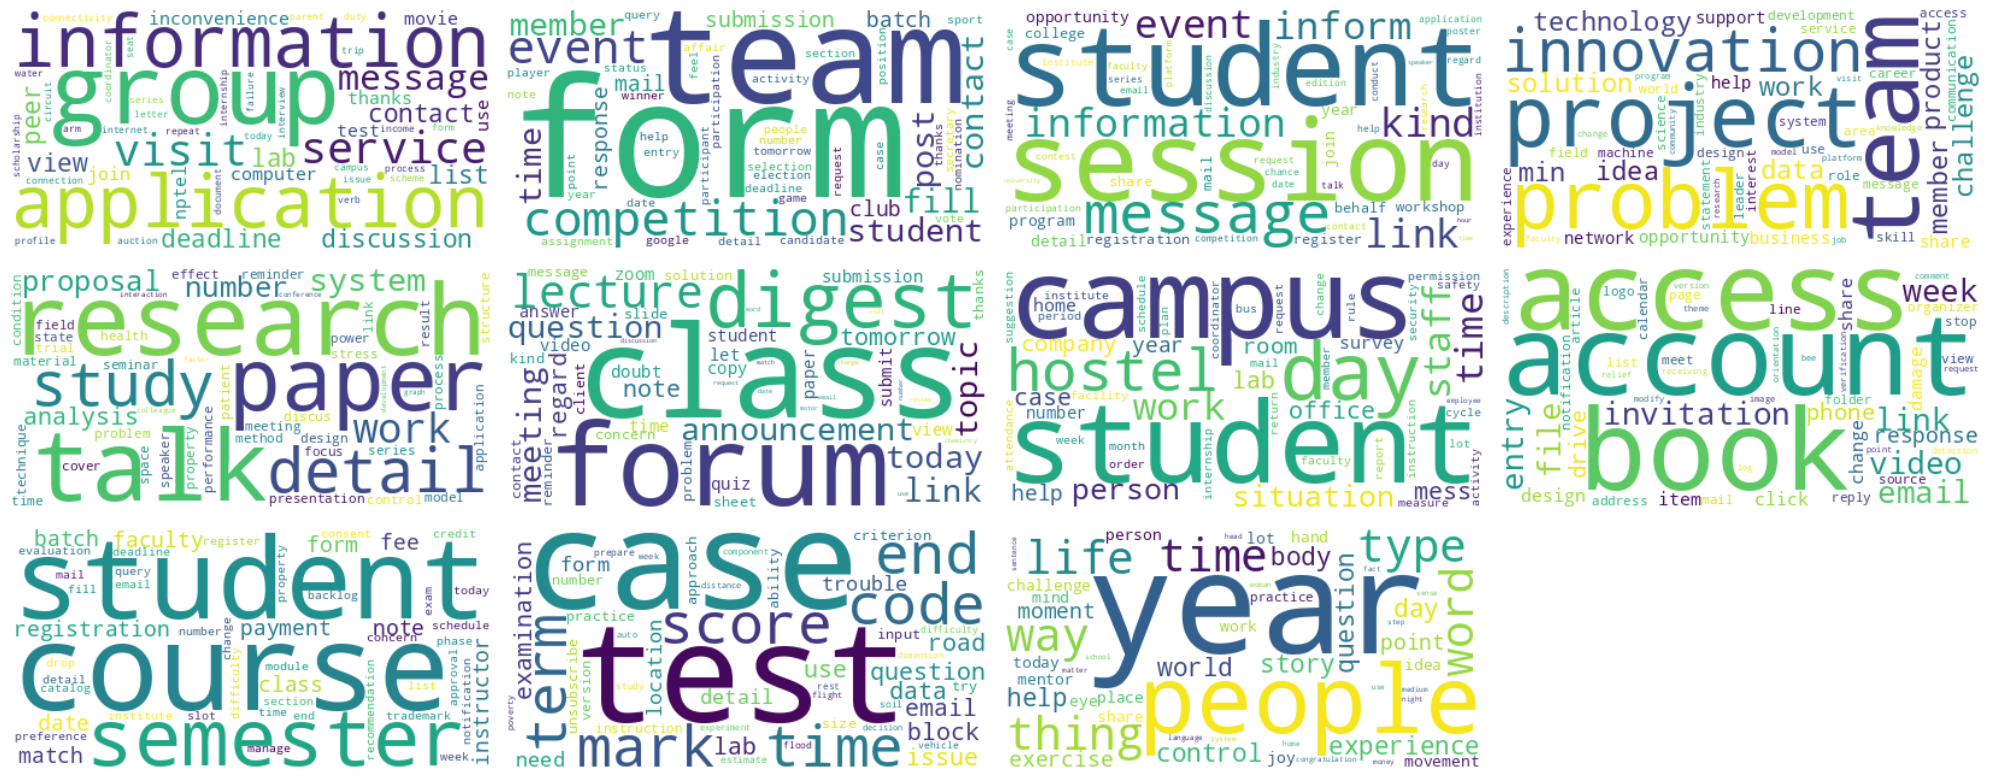

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cluster_text = [' '.join(cluster) for cluster in clusters]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))
axs = axs.flatten()

for i, text in enumerate(cluster_text): # replace ... with the rest of the word clouds
    wc = WordCloud(background_color="white").generate(cluster_text[i])
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

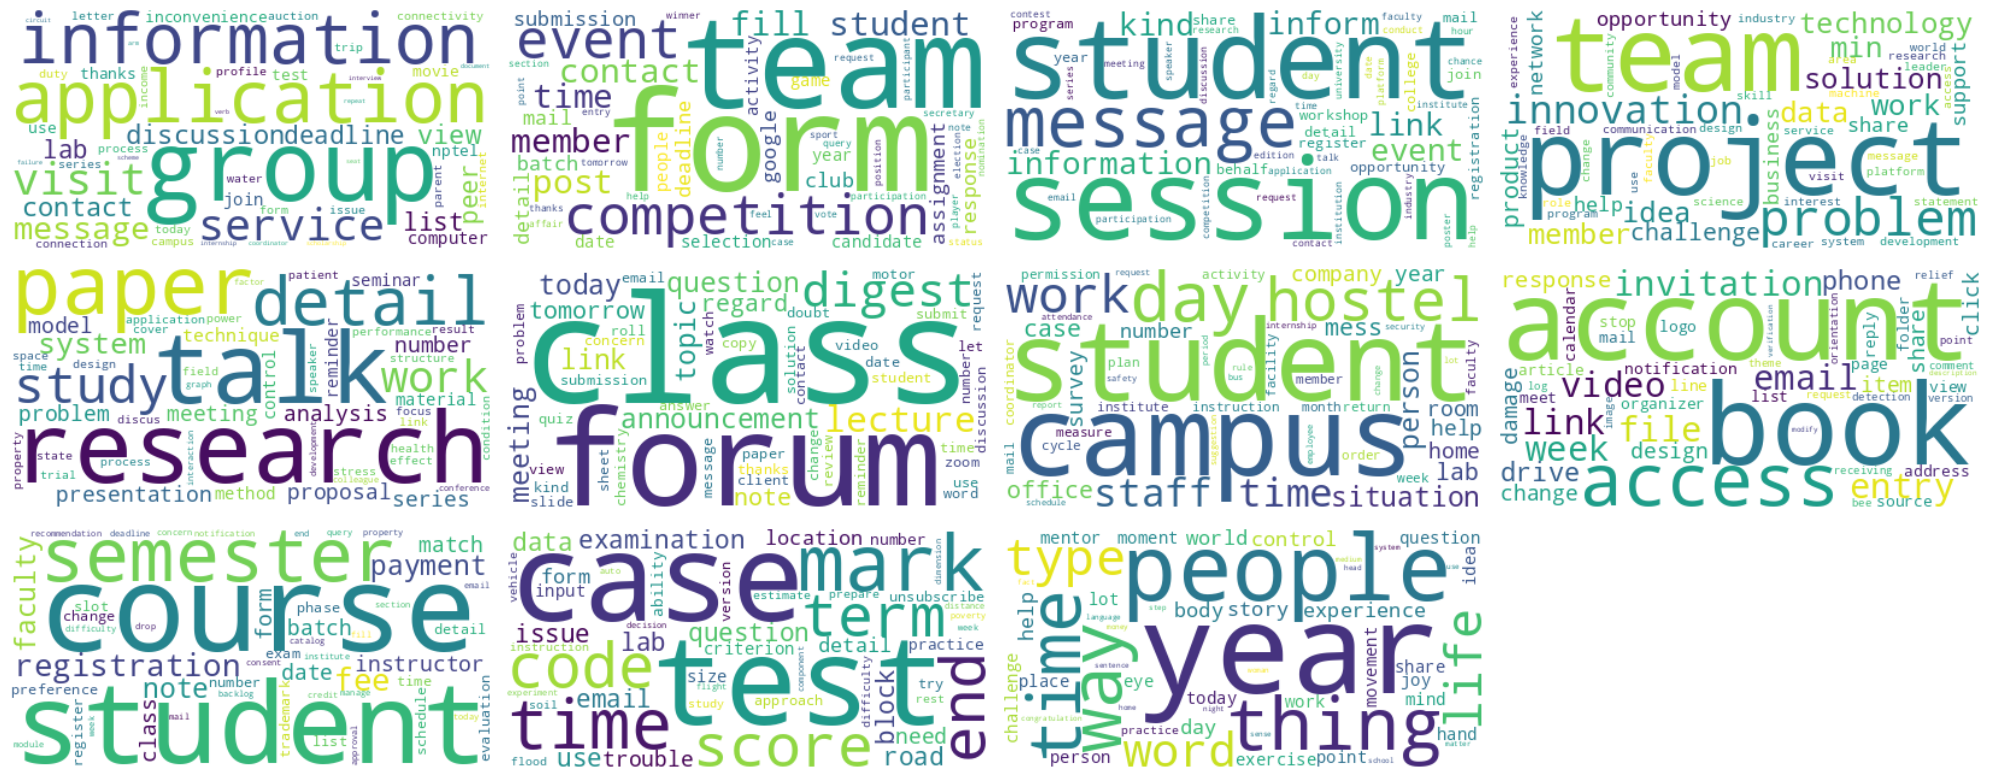

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cluster_text = [' '.join(cluster) for cluster in clusters]

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 8))
axs = axs.flatten()

for i, text in enumerate(cluster_text): # replace ... with the rest of the word clouds
    wc = WordCloud(background_color="white").generate(cluster_text[i])
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')

fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()

# LDA

In [86]:
from gensim import corpora, models
from gensim.test.utils import datapath
# model_path = datapath("/content/drive/MyDrive/BTP stuff/lda_model_11_dummy")
model_path = datapath("./lda_model_11/lda_model_1")

lda_model = models.ldamodel.LdaModel.load("lda_model_11/lda_model_1")
dictionary = lda_model.id2word

In [87]:
def lda_predict(text):
  text = preprocess(text)
  new_text_corpus = dictionary.doc2bow(text)
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  output_tags = []
  output_tags = list(d[prob_topics[0][0]].keys())[:4]
  return output_tags

In [88]:
with open("./Goldset/test19.txt") as f:
  text = f.read()
print(lda_predict(text))
print(text)

['team', 'post', 'form', 'club']
Dear Students:

All the exams scheduled for tomorrow at the Nila campus have been postponed to next week. The new date will be announced soon. Our apologies for the short notice. 

Please note that all the exams scheduled at the Ahalia campus will be conducted as per the schedule.

Thanks and regards,
--
Sudheesh

--
Sudheesh T. K.
Associate Professor (Civil Engg.) & 
Associate Dean (Academics, UG)
IIT Palakkad


In [89]:
def cluster_prediction(text):
  new_text_corpus =  dictionary.doc2bow(text.split())
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  return prob_topics[0][0]

In [90]:
tester = MailTester(test, data, lda_predict)

In [91]:
def lda_predict_tagOne(text):
  text = preprocess(text)
  new_text_corpus = dictionary.doc2bow(text)
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  output_tags = []
  output_tags = list(d[prob_topics[0][0]].keys())[:1]
  return output_tags

In [92]:
def lda_predict_tag_one(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            text = preprocess(line.strip())  # Assuming preprocess is a function you've defined
            new_text_corpus = dictionary.doc2bow(text)
            prob_topics = lda_model.get_document_topics(new_text_corpus)
            prob_topics.sort(key=lambda x: x[1], reverse=True)
            output_tags = list(d[prob_topics[0][0]].keys())[:1]
            outfile.write(','.join(output_tags) + '\n')

# Example usage:
input_file_path = 'GoldsetPreprocess.txt'  # Replace with the path to your input file
output_file_path = 'OutputByModel.txt'  # Replace with the path to your output file
lda_predict_tag_one(input_file_path, output_file_path)


In [93]:
input_f = 'starred_50.txt'
output_f = 'outputStarred_50.txt'
lda_predict_tag_one(input_f, output_f)

In [94]:
import pandas as pd

# Read the CSV file
data_read = pd.read_csv('GoldsetTag.csv')

# Extract the first tag for each document
data_read['First Tag'] = data_read['Tags'].str.split(',').str[0].str.strip()

# Create a new DataFrame with only the 'Mail subject' and 'First Tag' columns
output_data = data_read[['First Tag']]

# Write the new DataFrame to a text file
output_data.to_csv('GoldsetTopics.txt', index=False, header=None, sep='\t', encoding='utf-8')

print("Data extraction and writing completed.")


Data extraction and writing completed.


In [95]:
goldenClusters = {}
outputClusters = {}


In [96]:

#purity accuracy


def mapOfTopicWithId(outputClusters, input_file):
# Read the file and create the mapping
    with open(input_file, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            word = line.strip()
            
            # Update the mapping
            if word in outputClusters:
                outputClusters[word].add(line_number)
            else:
                outputClusters[word] = {line_number}


mapOfTopicWithId(outputClusters, 'outputStarred_50.txt')

mapOfTopicWithId(goldenClusters, 'starred_50_label.txt')


In [97]:
def compute_purity(output_clusters, golden_clusters, num_docs):
    count = 0

    for label, docs in output_clusters.items():
        correct_assigned_doc_num = 0
        print(label)
        for golden_label, golden_docs in golden_clusters.items():
            output_docs = set(docs)
            print(golden_label)
            simi = 1-cosine(glove_model[label], glove_model[golden_label])
            print(simi)
            if(simi < 0.4):
                continue
            # print(output_docs)
            output_docs.intersection_update(golden_docs)
            # print(output_docs)
            print('\n')
            if len(output_docs) >= correct_assigned_doc_num:
                correct_assigned_doc_num = len(output_docs)

        count += correct_assigned_doc_num

    value = count * 1.0 / num_docs
    print(f'\tPurity accuracy: {value}')
    return value

# Example usage:

compute_purity(outputClusters, goldenClusters, 100)


thing
internship
0.04405531659722328
campus
0.22157151997089386
interview
0.3930601179599762
japan
0.22614724934101105
flight
0.2378474473953247
placement
0.14320218563079834
coordinator
0.2330748438835144
cdc
0.060206666588783264
course
0.5107250809669495


test
0.30243387818336487
deadline
0.22010457515716553
alumni
0.12544414401054382
thanks
0.4390646517276764


ecology
0.0596763975918293
project
0.31170186400413513
meeting
0.2954091727733612
certificate
0.11708787083625793
yoga
0.18865211308002472
event
0.39734792709350586
club
0.308671772480011
language
0.2646277844905853
session
0.238295778632164
link
0.31837522983551025
scholarship
0.1448797881603241
group
internship
0.007946604862809181
campus
0.2380697876214981
interview
0.32902073860168457
japan
0.32428592443466187
flight
0.26496103405952454
placement
0.1918252557516098
coordinator
0.20654533803462982
cdc
0.09634584933519363
course
0.25248610973358154
test
0.2273961901664734
deadline
0.17442253232002258
alumni
0.2678795456886

0.04

In [98]:
with open("./Goldset/test19.txt") as f:
  text = f.read()
print(lda_predict_tagOne(text))
print(text)

['team']
Dear Students:

All the exams scheduled for tomorrow at the Nila campus have been postponed to next week. The new date will be announced soon. Our apologies for the short notice. 

Please note that all the exams scheduled at the Ahalia campus will be conducted as per the schedule.

Thanks and regards,
--
Sudheesh

--
Sudheesh T. K.
Associate Professor (Civil Engg.) & 
Associate Dean (Academics, UG)
IIT Palakkad


In [99]:
tester.statistics()

Accuracy (intersection):  0.05
Accuracy (body):  0.23
Accuracy (body+subject):  0.23
Accuracy (subject):  0.19
Cluster accuracy:  0.72
Hit rate @1,2,3,4:  0.1 0.13 0.17 0.29
Average precision:  0.1
Average recall:  0.12250000000000004


# LDA + Embedding

In [100]:
gdim = 200

In [101]:
def avg_embedding(data):
  # create the dict.
  x = data.keys()
  y = list(data.values())
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(x)

  # number of unique words in dict.
  # print("Number of unique words in dictionary=", len(tokenizer.word_index))
  # print("Dictionary is = ", tokenizer.word_index)
  def embedding_for_vocab(filepath, word_index, embedding_dim):
      vocab_size = len(word_index) + 1
      # Adding again 1 because of reserved 0 index
      embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
      with open(filepath, encoding="utf8") as f:
          for line in f:
              word, *vector = line.split()
              if word in word_index:
                  idx = word_index[word]
                  embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

      return embedding_matrix_vocab

  # matrix for vocab: word_index
  embedding_dim = gdim
  embedding_matrix_vocab = embedding_for_vocab('./glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

  # print("Dense vector for first word is => ", embedding_matrix_vocab[2])
  sum = np.zeros(gdim)
  for i in range(1, len(tokenizer.word_index)+1):
    sum += (y[i-1] * embedding_matrix_vocab[i])

  # print("Average of all word embeddings",
  #       sum/(len(tokenizer.word_index)+1))

  return embedding_matrix_vocab,sum/(len(tokenizer.word_index))

In [102]:
topic_embedds = []
topic_matrix = np.zeros((11,51,200))
i = 0
for listing in d:
    topic_matrix[i],v = avg_embedding(d[listing])
    topic_embedds.append(v)
    i += 1

FileNotFoundError: [Errno 2] No such file or directory: './glove.6B.200d.txt'

In [ ]:
def mail_avg_embedding(x):

  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(x)

  def embedding_for_vocab(filepath, word_index, embedding_dim):
      vocab_size = len(word_index) + 1
      # Adding again 1 because of reserved 0 index
      embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))

      with open(filepath, encoding="utf8") as f:
          for line in f:
              word, *vector = line.split()
              if word in word_index:
                  idx = word_index[word]
                  embedding_matrix_vocab[idx] = np.array(
                      vector, dtype=np.float32)[:embedding_dim]

      return embedding_matrix_vocab

  # matrix for vocab: word_index
  embedding_dim = gdim
  embedding_matrix_vocab = embedding_for_vocab('./glove.6B.200d.txt', tokenizer.word_index, embedding_dim)

  sum = np.zeros(gdim)
  for i in range(len(tokenizer.word_index)+1):
    sum += embedding_matrix_vocab[i]

  return sum/(len(tokenizer.word_index)+1)

In [ ]:
import operator

In [ ]:
def compare_single_embeddings(u,v):
  #u = glove[x].numpy()
  #print(u)
  cos = np.dot(u,v)/(norm(u)*norm(v))
  #print(cos)
  return cos

In [ ]:
def lda_glove_predict(text):
  x_test = preprocess(text)
  new_text_corpus =  dictionary.doc2bow(x_test)
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  output_tags = []
  topic = prob_topics[0][0]
  output_tags = list(d[topic].keys())

  wcos = {}
  u = mail_avg_embedding(x_test)
  #print(u)
  i = 1
  for word in list(output_tags)[:10]:
    val = 1-cosine(topic_matrix[topic][i],u)#compare_single_embeddings(topic_matrix[topic][i],u)
    wcos[word] = val
    i += 1
  top_4 = dict(sorted(wcos.items(), \
             key = operator.itemgetter(1),reverse = True))
  #print(wcos)
  #print(list(top_4.keys())[:4])
  return list(top_4.keys())[:4]

In [ ]:
with open("./Goldset/test2.txt") as f:
  text = f.read()
print("Subject of the Mail: ", data.iloc[1]['Mail subject'])
print("Ground Truth: ", data.iloc[1]['Tags'])
print("LDA Model: ", lda_predict(text))
print("LDA + GloVe Model: ", lda_glove_predict(text))

Subject of the Mail:  [Broadcast] Research Proposal of Mr. Jithin G Krishnan
Ground Truth:  research,proposal,presentation
LDA Model:  ['project', 'innovation', 'technology', 'team']
LDA + GloVe Model:  ['idea', 'project', 'technology', 'support']


In [ ]:
with open("./Goldset/test25.txt") as f:
  text = f.read()
print("Subject of the Mail: ", data.iloc[32]['Mail subject'])
print("Ground Truth: ", data.iloc[32]['Tags'])
print("LDA Model: ", lda_predict(text))
print("LDA + GloVe Model: ", lda_glove_predict(text))

Subject of the Mail:  [Broadcast] Research Seminar by Ranjuna M K on March 10, 2023
Ground Truth:  research,talk,seminar
LDA Model:  ['thing', 'way', 'type', 'life']
LDA + GloVe Model:  ['way', 'type', 'life', 'body']


In [ ]:
tester = MailTester(test, data, lda_glove_predict)

In [ ]:
tester.statistics()

Accuracy (intersection):  0.12
Accuracy (body):  0.37
Accuracy (body+subject):  0.35


/home/aditya/.local/lib/python3.10/site-packages/scipy/spatial/distance.py:622: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


Accuracy (subject):  0.32
Cluster accuracy:  0.94
Hit rate @1,2,3,4:  0.21 0.3 0.35 0.37
Average precision:  0.165
Average recall:  0.19333333333333336


# Sentence Embedding

In [ ]:
pip install -q -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.2 MB/s eta 0:00:00


In [ ]:
from gensim import corpora, models
from gensim.test.utils import datapath

# model_path = datapath("/content/drive/MyDrive/BTP stuff/lda_model_11_dummy")
# model_path = datapath("/content/drive/MyDrive/BTP stuff/lda_model_11/Copy of lda_model_11_dummy")

lda_model = models.ldamodel.LdaModel.load("lda_model_11/lda_model_1")

In [ ]:
dictionary = lda_model.id2word

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
from sentence_transformers import util
import operator

In [ ]:
def lda_sbert_predict(text):
  new_text_corpus =  dictionary.doc2bow(preprocess(text))
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  output_tags = []
  terms = text.split()
  topic = prob_topics[0][0]
  output_tags = list(d[topic].keys())
  # print(output_tags)
  input = []
  input.append(preprocess(text))
  if(len(input[0])<2):
    return []
  u = model.encode(input)
  wcos = {}
  i = 1
  for word in list(output_tags)[:10]:
    ls = []
    ls.append(word)
    v = model.encode(ls)
    val = util.pytorch_cos_sim(v,u)
    # print(val)
    wcos[word] = val.numpy()[0]
    i += 1
  top_4 = dict(sorted(wcos.items(), key = operator.itemgetter(1), reverse = True))
  print(top_4)
  return list(top_4.keys())[:4]

In [ ]:
tester2 = MailTester(test, data, lda_sbert_predict)

In [ ]:
with open("/content/drive/MyDrive/BTP stuff/BTP_TestSet_Mails/test.txt") as f:
  text = f.read()
print(lda_sbert_predict(text))

{'research': array([0.8074298], dtype=float32), 'analysis': array([0.43087754], dtype=float32), 'paper': array([0.40238902], dtype=float32), 'technique': array([0.38288957], dtype=float32), 'material': array([0.36038333], dtype=float32), 'proposal': array([0.3505902], dtype=float32), 'presentation': array([0.33871955], dtype=float32), 'seminar': array([0.31425345], dtype=float32), 'method': array([0.2836252], dtype=float32), 'talk': array([0.24166523], dtype=float32)}
['research', 'analysis', 'paper', 'technique']


In [ ]:
tester2.statistics()

Accuracy (intersection):  0.34
Accuracy (body):  0.56
Accuracy (body+subject):  0.59
Accuracy (subject):  0.41
Cluster accuracy:  0.47
Hit rate @1,2,3,4:  0.29 0.39 0.49 0.56
Average precision:  0.2625
Average recall:  0.3118333333333333


# Plots

In [ ]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
precisions = [tester.calc_precision(thresholds[i]) for i in range(5)]
recalls = [tester.calc_recall(thresholds[i]) for i in range(5)]

Average Precision: 0.765
Average Precision: 0.7
Average Precision: 0.65
Average Precision: 0.6425
Average Precision: 0.6425
Average Recall: 0.7354999999999999
Average Recall: 0.6736666666666666
Average Recall: 0.6246666666666666
Average Recall: 0.6181666666666665
Average Recall: 0.6181666666666665


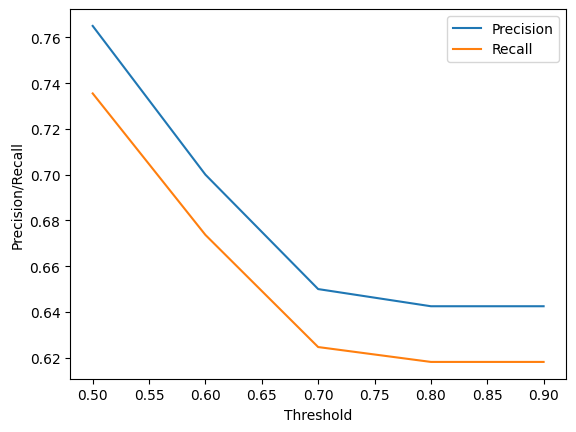

In [ ]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()

In [ ]:
def calc_similarity(word1, word2):
    return 1 - cosine(glove_model[word1], glove_model[word2])

def find_similar(list1, list2):
  scores = []
  for word1 in list1:
    mx = 0
    for word2 in list2:
      distance = calc_similarity(word1, word2)
      mx = max(mx, distance)
    scores.append(mx)
  return scores

In [ ]:
import matplotlib.pyplot as plt

def plot_similarity_thresholds(model):
  correct_predictions = 0
  total_predictions = 0
  l = []
  for index, row in data.iterrows():
      mail_body = test[index]
      subject = row['Mail subject'] + ' '
      expected_tags = row['Tags'].split(',')
      predicted_tags = model(subject+mail_body)
      scores = find_similar(predicted_tags, expected_tags)
      scores.sort(reverse=True)
      l.append(scores)
  x = [i for i in range(len(l))]
  y = [[]*4]
  y0 = [k[0] for k in l]
  y1 = [k[1] for k in l]
  y2 = [k[2] for k in l]
  y3 = [k[3] for k in l]
  y0.sort()
  y1.sort()
  y2.sort()
  y3.sort()
  plt.xlabel("Mails")
  plt.ylabel("Similarity score of tags")
  plt.plot(x,y0, label="tag 1")
  plt.plot(x,y1, label="tag 2")
  plt.plot(x,y2, label="tag 3")
  plt.plot(x,y3, label="tag 4")
  plt.legend()
  plt.show()

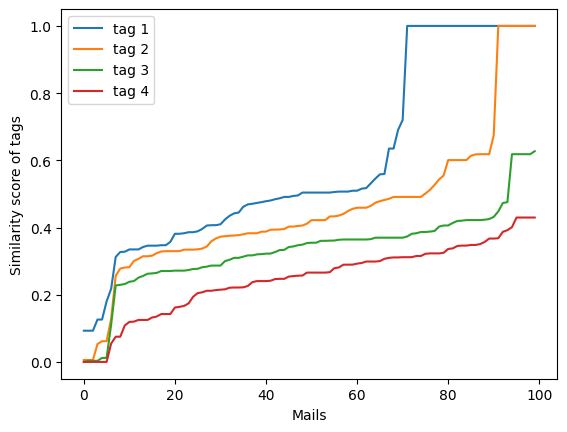

In [ ]:
plot_similarity_thresholds(lda_predict)

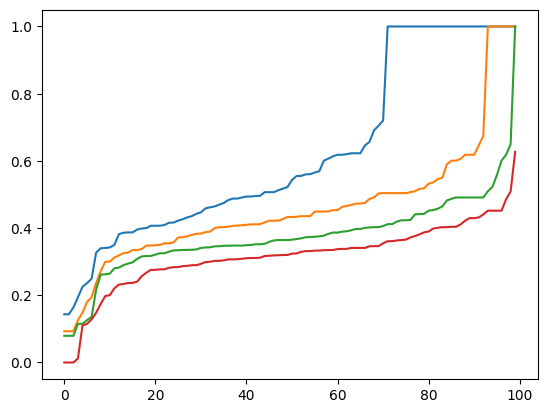

In [ ]:
plot_similarity_thresholds(lda_glove_predict)

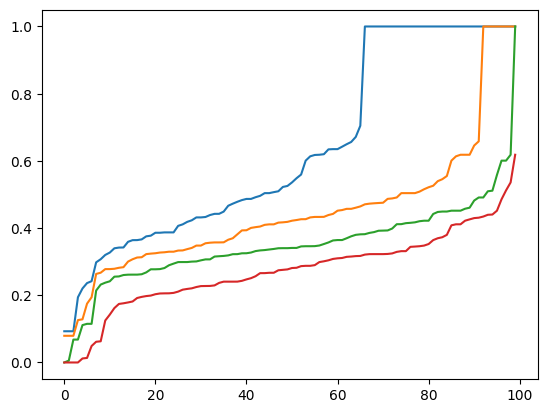

In [ ]:
plot_similarity_thresholds(lda_sbert_predict)

In [ ]:
def lda_sbert_scores(text):
  new_text_corpus =  dictionary.doc2bow(preprocess(text))
  prob_topics = lda_model.get_document_topics(new_text_corpus)
  prob_topics.sort(key = lambda x: x[1],reverse=True)
  output_tags = []
  terms = text.split()
  topic = prob_topics[0][0]
  output_tags = list(d[topic].keys())
  # print(output_tags)
  input = []
  input.append(preprocess(text))
  if(len(input[0])<2):
    return []
  u = model.encode(input)
  wcos = {}
  i = 1
  for word in list(output_tags)[:10]:
    ls = []
    ls.append(word)
    v = model.encode(ls)
    val = util.pytorch_cos_sim(v,u)
    # print(val)
    wcos[word] = val.numpy()[0]
    i += 1
  top_4 = dict(sorted(wcos.items(), key = operator.itemgetter(1), reverse = True))
  values_list = list(top_4.values())
  values_list = [x[0] for x in values_list]

  return values_list[:4]

In [ ]:
lda_sbert_scores(text)

[0.8074298, 0.43087754, 0.40238902, 0.38288957]

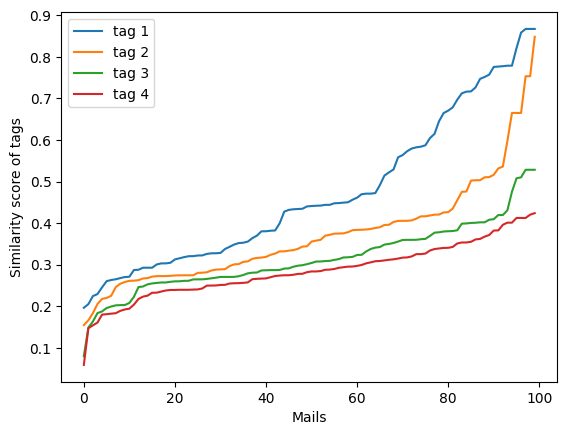

In [ ]:
l = []
for index, row in data.iterrows():
  mail_body = test[index]
  subject = row['Mail subject'] + ' '
  l.append(lda_sbert_scores(subject+mail_body))
x = [i for i in range(len(l))]
y = [[]*4]
y0 = [k[0] for k in l]
y1 = [k[1] for k in l]
y2 = [k[2] for k in l]
y3 = [k[3] for k in l]
y0.sort()
y1.sort()
y2.sort()
y3.sort()
plt.xlabel("Mails")
plt.ylabel("Similarity score of tags")
plt.plot(x,y0, label="tag 1")
plt.plot(x,y1, label="tag 2")
plt.plot(x,y2, label="tag 3")
plt.plot(x,y3, label="tag 4")
plt.legend()
plt.show()